## **Sales Data Challenge**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("Sales_Data_Challenges.csv")

In [3]:
dataset.shape

(1000, 9)

In [4]:
dataset.head()

,OrderID,Category,City,PaymentMethod,SaleDate,Price,Quantity,Discount,Revenue
0,ORD-7778,Furniture,Houston,Debit Card,2024-06-24,610.101338,1.0,20,488.08
1,ORD-6791,Furniture,Chicago,NaN,2024-05-02,714.329017,30.0,48,11143.53
2,ORD-6138,Stationery,New York,Credit Card,2024-01-07,761.840755,46.0,18,28736.63
3,ORD-8291,Furniture,New York,Credit Card,2024-06-27,564.990275,37.0,18,17141.80
4,ORD-1314,Appliances,Houston,Credit Card,2024-02-09,771.496793,30.0,11,20598.96


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        1000 non-null   object 
 1   Category       1000 non-null   object 
 2   City           1000 non-null   object 
 3   PaymentMethod  782 non-null    object 
 4   SaleDate       902 non-null    object 
 5   Price          961 non-null    float64
 6   Quantity       951 non-null    float64
 7   Discount       1000 non-null   int64  
 8   Revenue        915 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [6]:
dataset.describe()

,Price,Quantity,Discount,Revenue
count,961.000000,951.000000,1000.000000,915.000000
mean,501.203555,21.784437,24.307000,8156.316317
std,288.148549,18.374032,14.398614,9376.974167
min,10.472502,-49.000000,0.000000,-39277.820000
25%,261.704997,10.000000,12.000000,1875.955000
50%,494.138309,22.000000,24.000000,6123.070000
75%,765.958208,36.000000,36.000000,12636.470000
max,999.587843,50.000000,50.000000,43775.500000


In [7]:
cat_cols = dataset.select_dtypes("object").columns
num_cols = dataset.select_dtypes(["float64","int64"]).columns

In [15]:
for col in cat_cols:
    print(dataset[col].value_counts(dropna=False))

OrderID
ORD-6138    3
ORD-8046    3
ORD-9683    3
ORD-3022    2
ORD-7184    2
           ..
ORD-6069    1
ORD-4592    1
ORD-1479    1
ORD-9483    1
ORD-3852    1
Name: count, Length: 946, dtype: int64
Category
Clothing       214
Appliances     210
Furniture      203
Electronics    198
Stationery     175
Name: count, dtype: int64
City
Houston        215
Los Angeles    214
Phoenix        209
Chicago        197
New York       165
Name: count, dtype: int64
PaymentMethod
NaN               218
Online Payment    205
Debit Card        200
Cash              198
Credit Card       179
Name: count, dtype: int64
SaleDate
NaN           98
2024-01-03    13
2024-02-12    12
2024-04-12    11
2024-03-10    10
              ..
2024-02-17     2
2024-01-09     2
2024-05-05     1
2024-04-02     1
2024-01-05     1
Name: count, Length: 182, dtype: int64


In [17]:
dataset.isnull().sum()

OrderID            0
Category           0
City               0
PaymentMethod    218
SaleDate          98
Price             39
Quantity          49
Discount           0
Revenue           85
dtype: int64

In [19]:
dataset.duplicated().sum()

0

## Data Cleaning and Preprocessing

In [22]:
num_cols

Index(['Price', 'Quantity', 'Discount', 'Revenue'], dtype='object')

In [24]:
# cleaning numerical columns
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy="mean")
transformed = simple.fit_transform(dataset[num_cols])
imputed = pd.DataFrame(transformed, columns = num_cols)
dataset[num_cols] = imputed

In [25]:
dataset.isnull().sum()

OrderID            0
Category           0
City               0
PaymentMethod    218
SaleDate          98
Price              0
Quantity           0
Discount           0
Revenue            0
dtype: int64

In [26]:
cat_cols

Index(['OrderID', 'Category', 'City', 'PaymentMethod', 'SaleDate'], dtype='object')

In [27]:
for col in cat_cols:
    dataset[col] = dataset[col].ffill()

In [28]:
dataset.isnull().sum()

OrderID          0
Category         0
City             0
PaymentMethod    0
SaleDate         0
Price            0
Quantity         0
Discount         0
Revenue          0
dtype: int64

In [31]:
dataset.head(10)

,OrderID,Category,City,PaymentMethod,SaleDate,Price,Quantity,Discount,Revenue
0,ORD-7778,Furniture,Houston,Debit Card,2024-06-24,610.101338,1.0,20.0,488.08
1,ORD-6791,Furniture,Chicago,Debit Card,2024-05-02,714.329017,30.0,48.0,11143.53
2,ORD-6138,Stationery,New York,Credit Card,2024-01-07,761.840755,46.0,18.0,28736.63
3,ORD-8291,Furniture,New York,Credit Card,2024-06-27,564.990275,37.0,18.0,17141.80
4,ORD-1314,Appliances,Houston,Credit Card,2024-02-09,771.496793,30.0,11.0,20598.96
5,ORD-6201,Electronics,New York,Online Payment,2024-01-15,842.010997,24.0,34.0,13337.45
6,ORD-8276,Electronics,Chicago,Cash,2024-06-08,934.347281,15.0,49.0,7147.76
7,ORD-6245,Clothing,New York,Cash,2024-01-10,139.460339,35.0,26.0,3612.02
8,ORD-3019,Clothing,Phoenix,Debit Card,2024-01-10,463.760086,18.0,9.0,7596.39
9,ORD-8667,Stationery,Los Angeles,Credit Card,2024-02-16,618.535825,50.0,0.0,30926.79


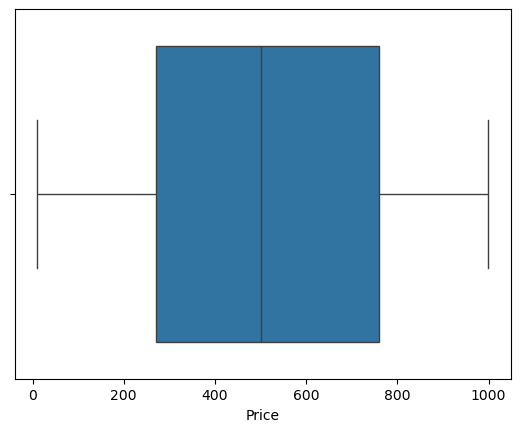

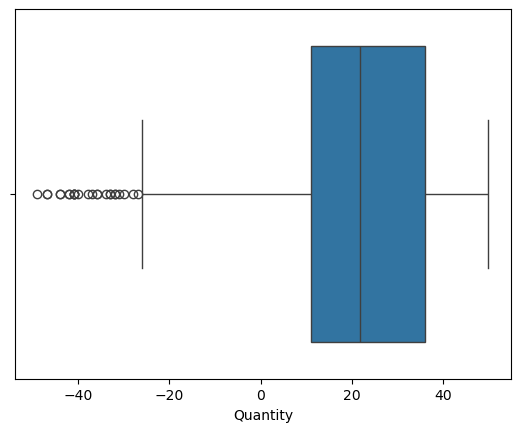

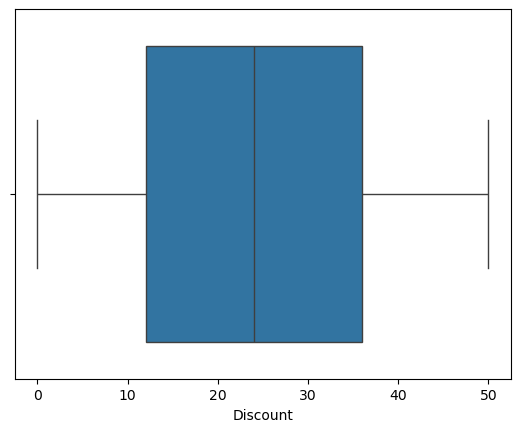

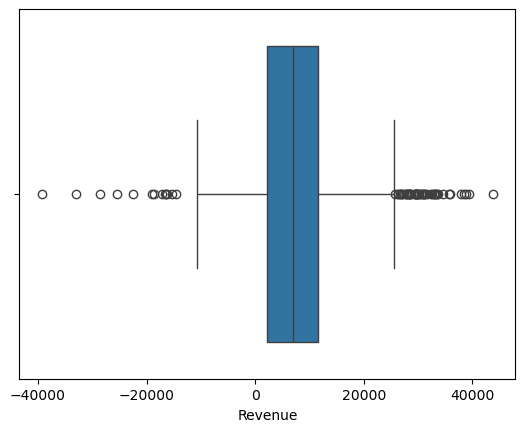

In [35]:
for col in num_cols:
    sns.boxplot(data=dataset, x=col)
    plt.show()

In [37]:
# checking outliers
for col in num_cols:
    q1, median, q3 = np.percentile(dataset[col], [25,50,75])
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    print(f"Median of {col}: ", median)
    dataset.drop(dataset[dataset[col]<lower_bound].index, inplace=True)
    dataset.drop(dataset[dataset[col]>upper_bound].index, inplace=True)

Median of Price:  501.2035553280757
Median of Quantity:  21.784437434279706
Median of Discount:  24.0
Median of Revenue:  7252.93


In [38]:
dataset.shape

(926, 9)

### Exploratory Data Analysis

#### 1. Calculate the total revenue generated by each City.

In [41]:
# total revenue generated by each city
dataset_cities = dataset[['City','Revenue']]
data_gp1 = dataset_cities.groupby('City', as_index=False)['Revenue'].sum()
data_gp1

,City,Revenue
0,Chicago,1.511970e+06
1,Houston,1.443580e+06
2,Los Angeles,1.557050e+06
3,New York,1.042953e+06
4,Phoenix,1.453218e+06


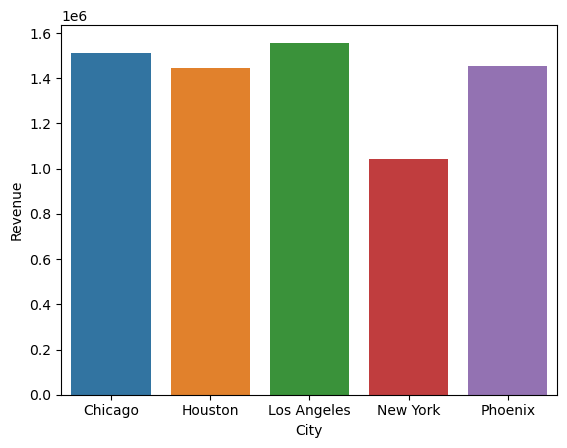

In [42]:
sns.barplot(x='City',y='Revenue', hue='City', data=data_gp1)
plt.show()

#### 2.Identify the Category with the highest sales and the most significant contribution to total revenue.

In [44]:
# category with highest sales and major contribution to revenue
dataset_cats = dataset[['Category','OrderID','Revenue']]
data_gp2 = dataset_cats.groupby(['Category'], as_index=False)['Revenue'].sum()
data_gp3 = dataset_cats.groupby(['Category'], as_index=False)['OrderID'].count()

In [45]:
data_gp2.merge(data_gp3)

,Category,Revenue,OrderID
0,Appliances,1.497403e+06,195
1,Clothing,1.491071e+06,200
2,Electronics,1.396957e+06,185
3,Furniture,1.348875e+06,187
4,Stationery,1.274466e+06,159


#### 3. Find products with frequent sales discrepancies (e.g., high discount percentages, missing prices).

In [47]:
print(dataset[dataset['Discount']>45]) # discount greater than 45%

      OrderID     Category         City PaymentMethod    SaleDate       Price  \
1    ORD-6791    Furniture      Chicago    Debit Card  2024-05-02  714.329017   
6    ORD-8276  Electronics      Chicago          Cash  2024-06-08  934.347281   
10   ORD-1581   Stationery      Chicago   Credit Card  2024-04-29  738.910908   
14   ORD-5575   Stationery      Phoenix    Debit Card  2024-01-24  785.350716   
18   ORD-2014     Clothing      Phoenix          Cash  2024-03-27  691.177931   
..        ...          ...          ...           ...         ...         ...   
952  ORD-5126    Furniture  Los Angeles    Debit Card  2024-04-29  382.464458   
958  ORD-2715   Appliances     New York    Debit Card  2024-04-15  724.831454   
967  ORD-4575     Clothing     New York    Debit Card  2024-03-16  523.382456   
971  ORD-6504  Electronics      Phoenix   Credit Card  2024-03-15   74.781196   
996  ORD-6235    Furniture      Phoenix          Cash  2024-02-15  428.666656   

      Quantity  Discount   

In [50]:
print(dataset[(dataset['Price']==0) | (dataset['Price'].isnull())]) # missing prices

Empty DataFrame
Columns: [OrderID, Category, City, PaymentMethod, SaleDate, Price, Quantity, Discount, Revenue]
Index: []


#### 4.Which PaymentMethod is the most preferred?

In [54]:
dataset['PaymentMethod'].value_counts()

PaymentMethod
Online Payment    253
Debit Card        233
Cash              232
Credit Card       208
Name: count, dtype: int64

<Axes: xlabel='PaymentMethod', ylabel='count'>

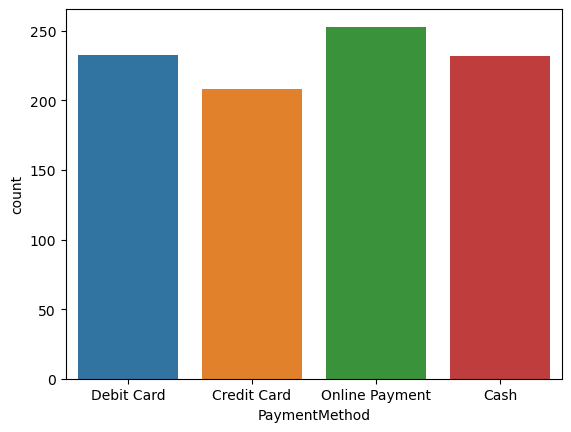

In [55]:
sns.countplot(x='PaymentMethod',hue='PaymentMethod',data=dataset)

#### 5. Are there any cities with a bias toward specific payment methods?

In [59]:
data1 = dataset[['City','PaymentMethod']]
data_gp = data1.groupby('City', as_index=False)['PaymentMethod'].value_counts()
data_gp

,City,PaymentMethod,count
0,Chicago,Cash,54
1,Chicago,Online Payment,47
2,Chicago,Credit Card,41
3,Chicago,Debit Card,41
4,Houston,Online Payment,60
5,Houston,Debit Card,50
6,Houston,Credit Card,45
7,Houston,Cash,44
8,Los Angeles,Debit Card,57
9,Los Angeles,Cash,56


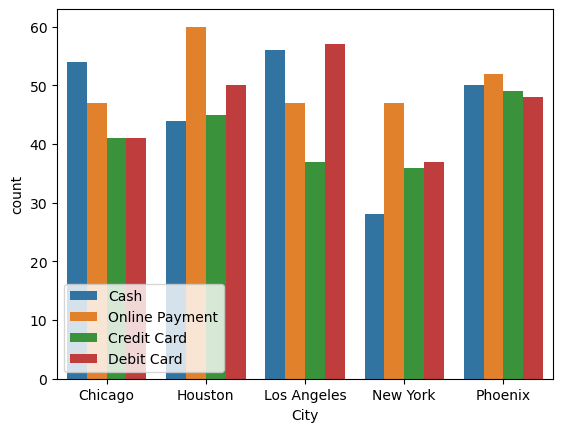

In [62]:
ax = sns.barplot(x='City', y='count', hue='PaymentMethod', data=data_gp)
plt.legend(loc='lower left')
plt.show()

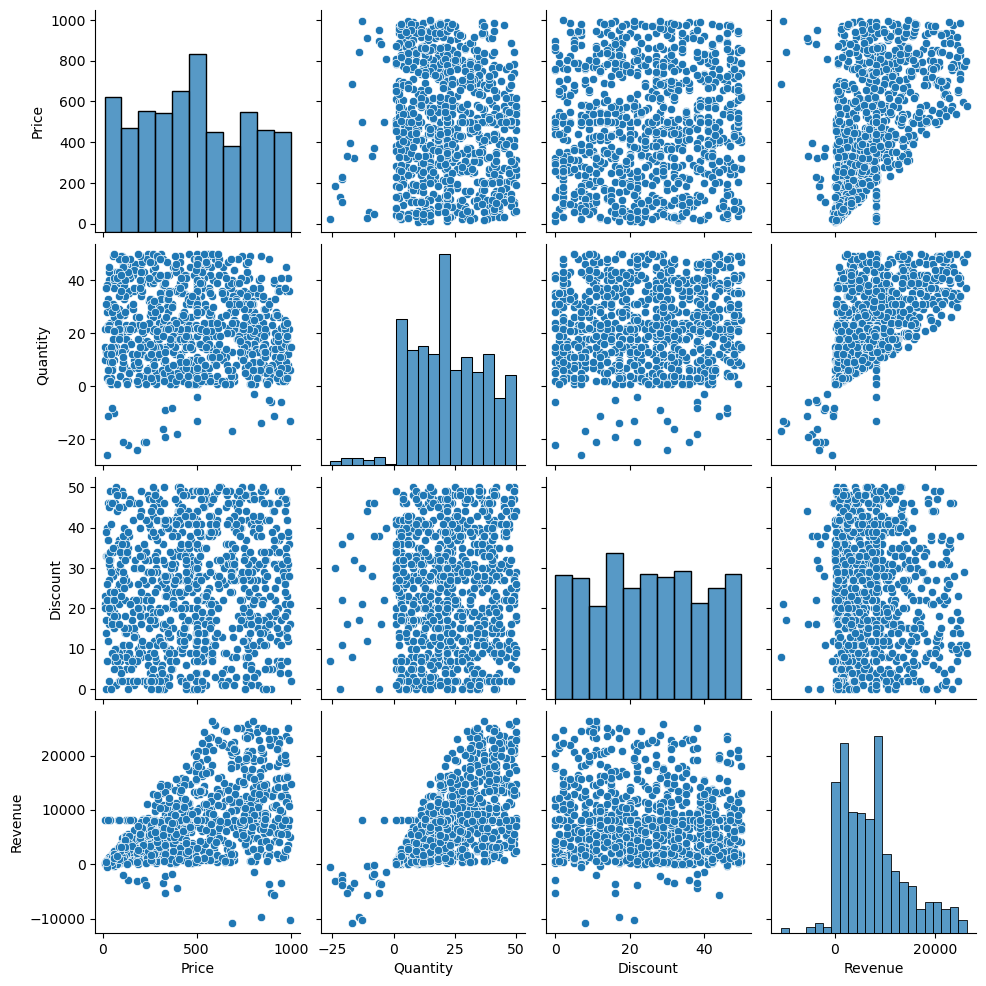

In [65]:
sns.pairplot(dataset[num_cols])

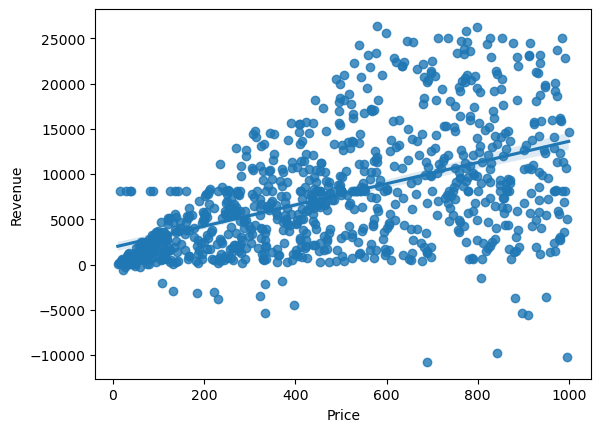

In [66]:
sns.regplot(x='Price', y='Revenue', data=dataset)
plt.show()